# Store Sales Forecasting
### Machine Learning (Linear Regression)

This notebook explores a <b>Linear Regression</b> approach for predicting product sales. The focus is on applying and understanding this statistical method using a dataset obtained for this purpose.
This model includes the essential components for a linear regression analysis.

<b>Model Workflow For Sales Forecasting:</b><br>
<b>1.</b> Importing Essential Libraries.<br>
<b>2.</b> Initial Data Loading & Preprocessing.<br>
<b>3.</b> Extracting Time Components From Dates.<br>
<b>4.</b> Feature Engineering & Data Splitting For Model Evaluation.<br>
<b>5.</b> Selecting Key Features, Fitting The Model, & Making Predictions.<br>
<b>6.</b> Calculating Prediction Errors & Evaluating Model Performance with Key Metrics.<br>
<b>7.</b> Visualizing Actual vs. Predicted Sales & Error Magnitude.<br>
<b>8.</b> Presenting Individual Prediction Errors & Summarizing Total Sales Performance.<br>

<b>Dataset:</b><br>
<b>1.</b> Data Transformation.<br>
<b>2.</b> Dividing The Dataset Into Multiple Files.<br>

<b>This Notbook Has Been Structured As The Following:</b><br>
Forecasting The First Item <b>=></b> Model Workflow With Explanation For Each Step <b>=></b> Starting With The Second Item Through The Sixth Item <b>=></b> Finally All The Items Combined.

________________________________________________________________________________________________________________________________
# Forecast For The First Item:
<b>1. Importing Essential Libraries for Sales Forecasting and Data Visualization:</b><br>

- Importing libraries and setting the context for their use in sales forecasting (like linear regression, feature selection) and   data visualization (plotting and graphical representation).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import median_absolute_error, explained_variance_score
from math import sqrt

<b>2. Initial Data Loading and Preprocessing for Store Sales Analysis:</b><br>

- The primary actions taken:<br> 
  <b>1- </b> loading the sales data from a CSV file<br>
  <b>2- </b> conducting initial preprocessing steps:<br>
  <b>I- </b> filtering the data for a specific store.<br>
  <b>II- </b> converting date strings to datetime objects.

In [2]:
df = pd.read_csv('C:/Users/moham/Desktop/itemOneMS.csv')
df = df[df['store'] == 1]
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')

<b>3. Extracting Time Components from Dates for Enhanced Data Analysis:</b><br>

- The process of breaking down the date column into more granular time components like:<br>
  <b>I- </b> year<br>
  <b>II- </b> month<br>
  <b>III- </b> day<br>
  <b>IV- </b> weekday<br>
  is a key step in preparing and enriching the dataset for detailed time series analysis.

In [3]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['weekday'] = np.where(df['weekday'] == 0, 7, df['weekday'])

<b>4. Feature Engineering for Time Series Forecasting and Data Splitting for Model Evaluation:</b><br>

- We have two primary tasks being performed in this segment of the code:<br>
<b>I- </b>Creating time-related features (lag features and rolling window statistics) that are crucial for capturing temporalpatterns in the sales data.<br>
<b>II- </b>Preparing the dataset for the subsequent modeling process by splitting it into training and testing sets, a key stepin evaluating the model's performance on unseen data.

In [4]:
for i in range(1, 8):
    lag_i = 'lag_' + str(i)
    df[lag_i] = df.sales.shift(i)
df['rolling_mean'] = df.sales.rolling(window=7).mean()
df['rolling_max'] = df.sales.rolling(window=7).max()
df['rolling_min'] = df.sales.rolling(window=7).min()

df = df.dropna(how='any', axis=1)
df = df.set_index('date')
train_df = df.loc[:'2021-12-31']
test_df = df.loc['2022-01-01':]

<b>5. Selecting Key Features, Fitting the Linear Regression Model, and Making Predictions:</b><br>

- the three main steps in this code segment:<br> 
<b>I.</b> selecting the most significant features for the model.<br> 
<b>II.</b> training the linear regression model with the training data.<br> 
<b>III.</b> using the model to make sales forecasts on the test data.<br>

In [5]:
X_train = train_df.drop(['sales'], axis=1)
y_train = train_df['sales'].values
X_test = test_df.drop(['sales'], axis=1)
y_test = test_df['sales'].values
top_features = SelectKBest(score_func=f_regression, k=5)
fit = top_features.fit(X_train, y_train)
X_train = X_train[X_train.columns[top_features.get_support()]]
X_test = X_test[X_test.columns[top_features.get_support()]]
model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

<b>6. Calculating Prediction Errors and Evaluating Model Performance with Key Metrics:<b/><br>
   
- This segment of the code focuses on evaluating the performance of the linear regression model used for sales forecasting. It     calculates the prediction errors and assesses the model using four key metrics:

  <b>I. MAE (Mean Absolute Error) & RMSE (Root Mean Squared Error):</b> both  provide insights into the average error magnitude      and the impact of large errors respectively.<br>
     <b>II. MAPE (Mean Absolute Percentage Error):</b>This one offers a percentage-based accuracy measure.<br>
     <b>III. R² (Coefficient of Determination):</b> expressed as Accuracy, reflects the proportion of the outcome variance            explained by the model, offering a broader view of its predictive power.<br>
    
     Together, these metrics offer a comprehensive assessment of the model's accuracy and reliability in predicting sales data.

In [6]:
errors_df = test_df[['sales']].copy()
errors_df['pred_sales'] = preds
errors_df['errors'] = preds - y_test
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mae = mean_absolute_error(errors_df['sales'], errors_df['pred_sales'])
rmse = sqrt(mean_squared_error(errors_df['sales'], errors_df['pred_sales']))
mape_value = mape(errors_df['sales'], errors_df['pred_sales'])
r_squared = r2_score(errors_df['sales'], errors_df['pred_sales'])
accuracy = r_squared * 100 
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'MAPE', 'Accuracy'],
    'Value': [mae, rmse, mape_value, accuracy]
})
print("Evaluation Metrics:")
display(metrics_df)

Evaluation Metrics:


,Metric,Value
0,MAE,44.981949
1,RMSE,56.092928
2,MAPE,8.126070
3,Accuracy,7.085278


<b>7. Visualizing Actual vs. Predicted Sales and Error Magnitude in Linear Regression Forecast:</b>

- creating a visual comparison between actual sales and the sales predicted by the linear regression model, along with a           graphical representation of the error magnitude between these two values.

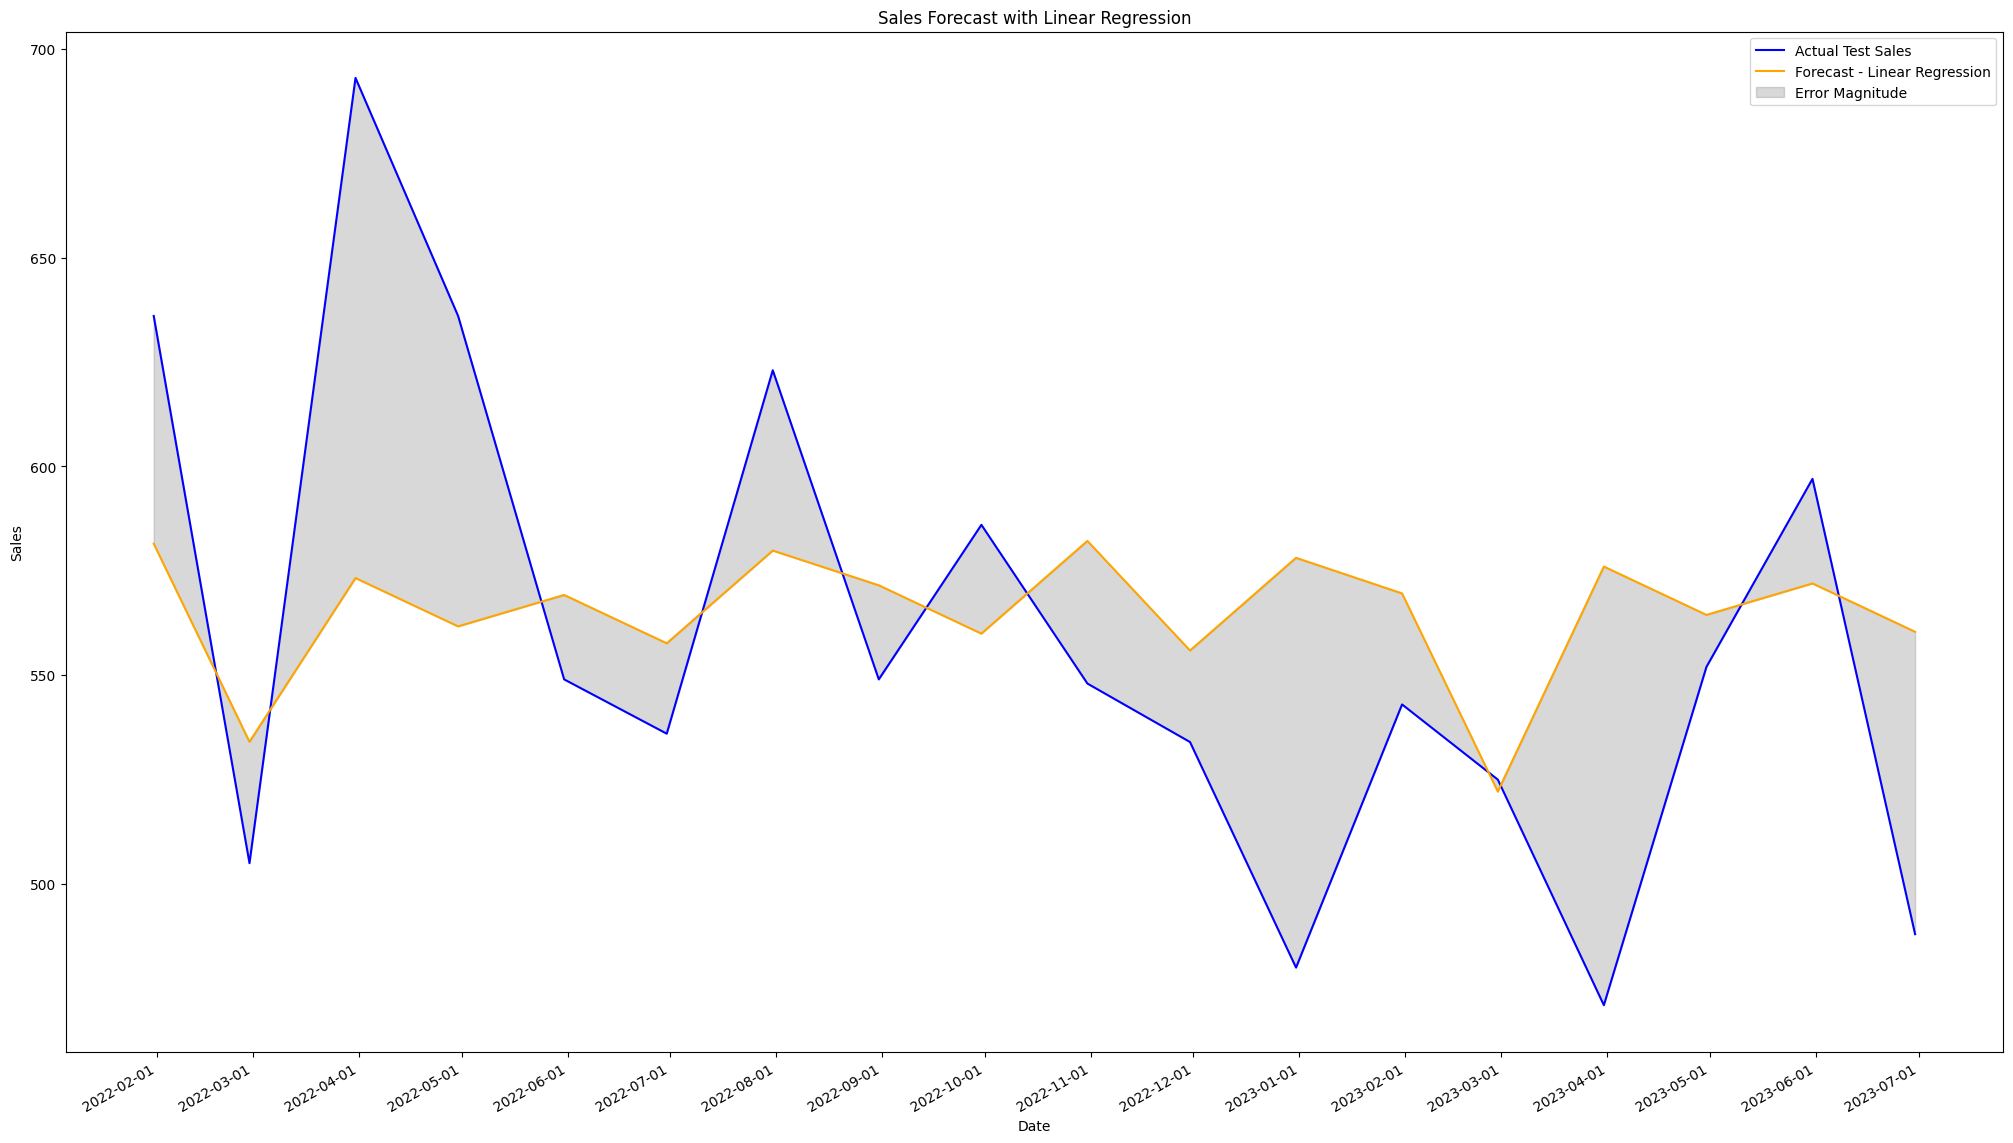

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.figure(figsize=(25, 15))
plt.plot(errors_df.index, errors_df['sales'], label='Actual Test Sales', color='blue')
plt.plot(errors_df.index, errors_df['pred_sales'], label='Forecast - Linear Regression', color='orange')
plt.fill_between(errors_df.index, errors_df['sales'], errors_df['pred_sales'], color='gray', alpha=0.3, label='Error Magnitude')
plt.title('Sales Forecast with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()
plt.show()

<b>8. Presenting Individual Prediction Errors and Summarizing Total Sales Performance:</b>

- showcasing the detailed errors for each prediction and providing a summary of the total actual and predicted sales figures,     offering a clear perspective on the model's overall forecasting effectiveness.

In [8]:
print("\nIndividual Errors:")
display(errors_df[['sales', 'pred_sales', 'errors']])
total_actual_sales = errors_df['sales'].sum()
total_predicted_sales = errors_df['pred_sales'].sum()
print("\nTotal Actual Sales: {:.2f}".format(total_actual_sales))
print("Total Predicted Sales: {:.2f}".format(total_predicted_sales))


Individual Errors:


,sales,pred_sales,errors
date,,,
2022-01-31,636,581.492315,-54.507685
2022-02-28,505,534.059911,29.059911
2022-03-31,693,573.257376,-119.742624
2022-04-30,636,561.684910,-74.315090
2022-05-31,549,569.212426,20.212426
2022-06-30,536,557.639959,21.639959
2022-07-31,623,579.832436,-43.167564
2022-08-31,549,571.524978,22.524978
2022-09-30,586,559.952512,-26.047488



Total Actual Sales: 10051.00
Total Predicted Sales: 10169.33


________________________________________________________________________________________________________________________________
# Forecast For The Second Item:
- The same previous steps will be repated.

Evaluation Metrics:


,Metric,Value
0,MAE,42.660614
1,RMSE,55.106307
2,MAPE,8.631555
3,Accuracy,1.611151


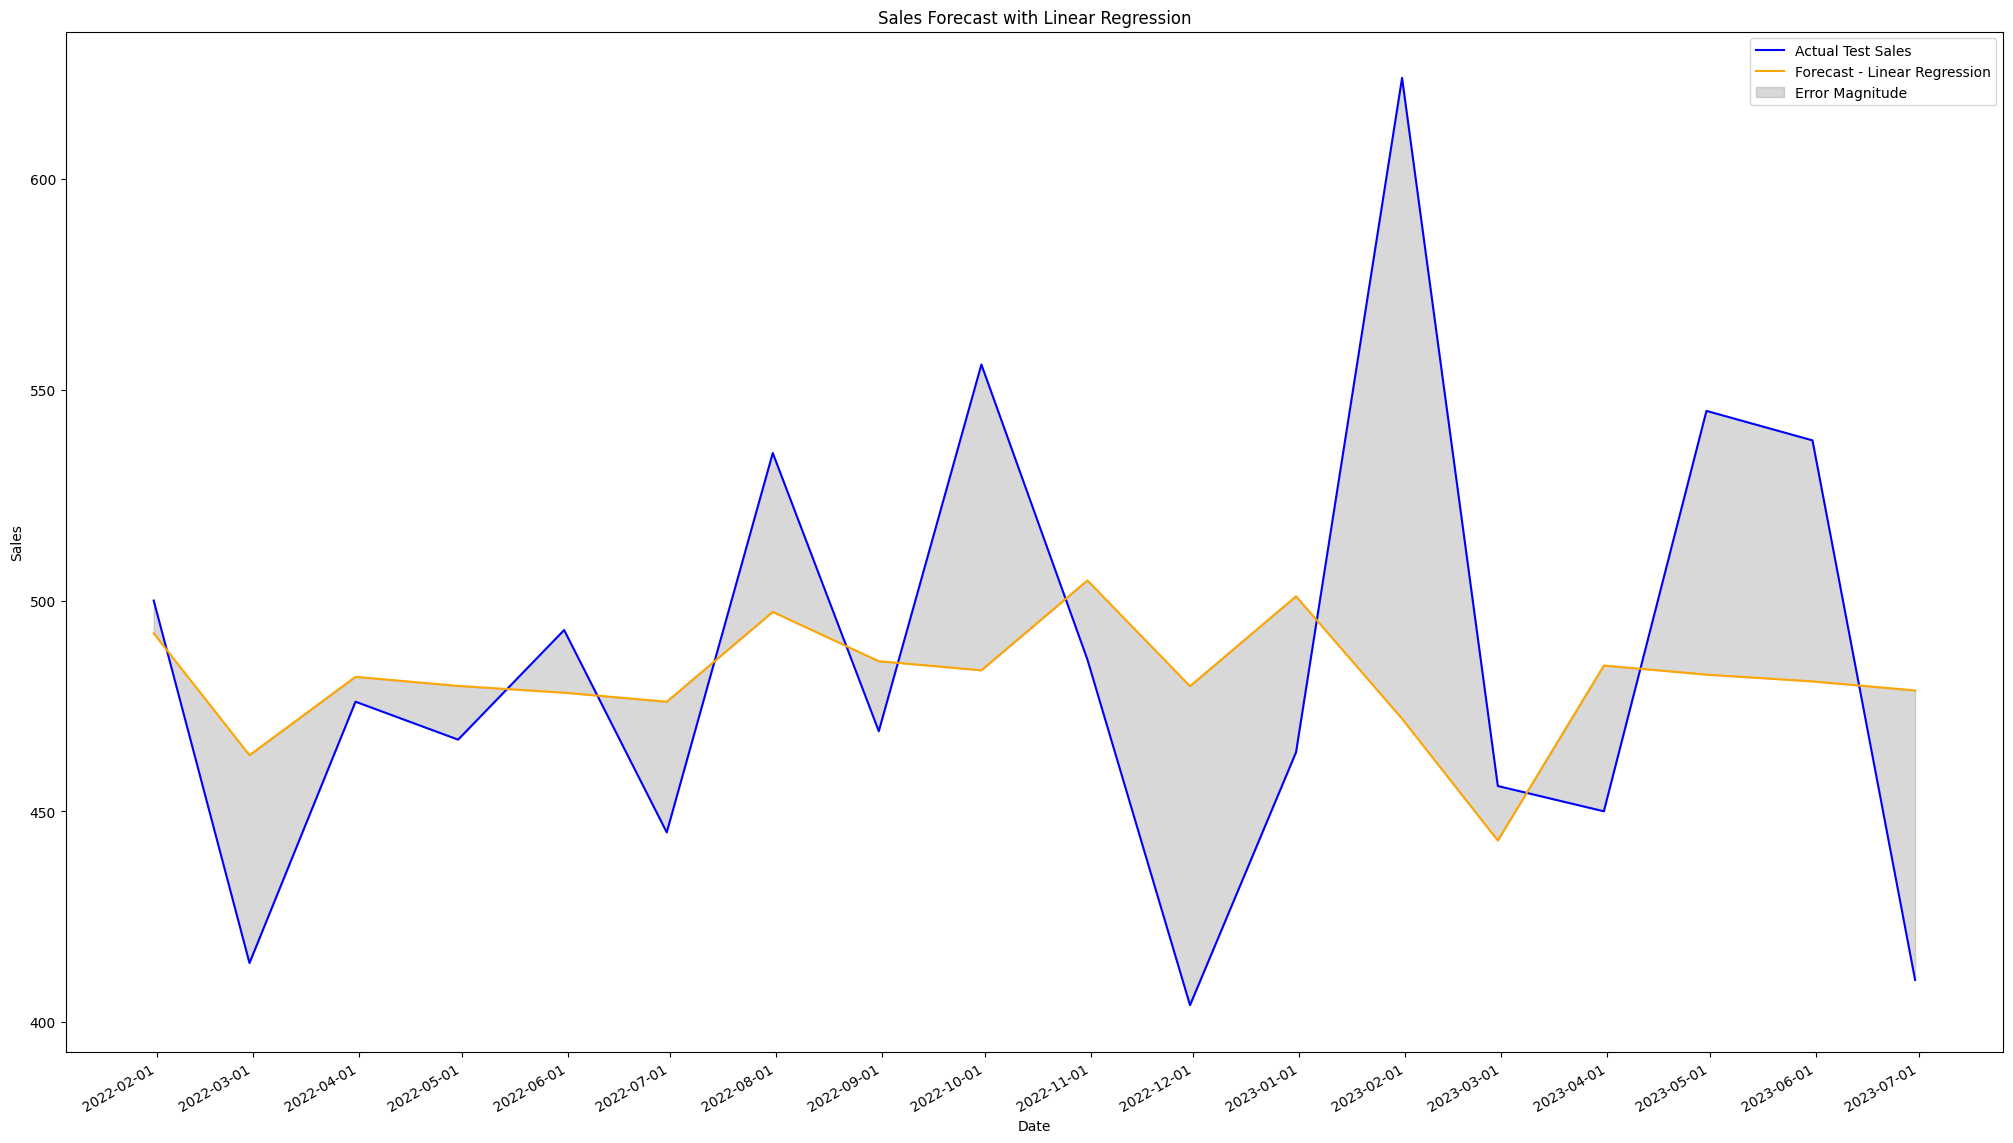


Individual Errors:


,sales,pred_sales,errors
date,,,
2022-01-31,500,492.210050,-7.789950
2022-02-28,414,463.304604,49.304604
2022-03-31,476,481.899383,5.899383
2022-04-30,467,479.745917,12.745917
2022-05-31,493,478.139859,-14.860141
2022-06-30,445,475.986393,30.986393
2022-07-31,535,497.309336,-37.690664
2022-08-31,469,485.602859,16.602859
2022-09-30,556,483.449393,-72.550607



Total Actual Sales: 8732.00
Total Predicted Sales: 8664.62


In [9]:
df = pd.read_csv('C:/Users/moham/Desktop/itemTwoMS.csv')
df = df[df['store'] == 1]
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['weekday'] = np.where(df['weekday'] == 0, 7, df['weekday'])
for i in range(1, 8):
    lag_i = 'lag_' + str(i)
    df[lag_i] = df.sales.shift(i)
df['rolling_mean'] = df.sales.rolling(window=7).mean()
df['rolling_max'] = df.sales.rolling(window=7).max()
df['rolling_min'] = df.sales.rolling(window=7).min()
df = df.dropna(how='any', axis=1)
df = df.set_index('date')
train_df = df.loc[:'2021-12-31']
test_df = df.loc['2022-01-01':]
X_train = train_df.drop(['sales'], axis=1)
y_train = train_df['sales'].values
X_test = test_df.drop(['sales'], axis=1)
y_test = test_df['sales'].values
top_features = SelectKBest(score_func=f_regression, k=5)
fit = top_features.fit(X_train, y_train)
X_train = X_train[X_train.columns[top_features.get_support()]]
X_test = X_test[X_test.columns[top_features.get_support()]]
model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)
errors_df = test_df[['sales']].copy()
errors_df['pred_sales'] = preds
errors_df['errors'] = preds - y_test
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mae = mean_absolute_error(errors_df['sales'], errors_df['pred_sales'])
rmse = sqrt(mean_squared_error(errors_df['sales'], errors_df['pred_sales']))
mape_value = mape(errors_df['sales'], errors_df['pred_sales'])
r_squared = r2_score(errors_df['sales'], errors_df['pred_sales'])
accuracy = r_squared * 100 
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'MAPE', 'Accuracy'],
    'Value': [mae, rmse, mape_value, accuracy]
})
print("Evaluation Metrics:")
display(metrics_df)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.figure(figsize=(25, 15))
plt.plot(errors_df.index, errors_df['sales'], label='Actual Test Sales', color='blue')
plt.plot(errors_df.index, errors_df['pred_sales'], label='Forecast - Linear Regression', color='orange')
plt.fill_between(errors_df.index, errors_df['sales'], errors_df['pred_sales'], color='gray', alpha=0.3, label='Error Magnitude')
plt.title('Sales Forecast with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()
plt.show()
print("\nIndividual Errors:")
display(errors_df[['sales', 'pred_sales', 'errors']])
total_actual_sales = errors_df['sales'].sum()
total_predicted_sales = errors_df['pred_sales'].sum()
print("\nTotal Actual Sales: {:.2f}".format(total_actual_sales))
print("Total Predicted Sales: {:.2f}".format(total_predicted_sales))

________________________________________________________________________________________________________________________________
# Forecast For The Third Item:
- The same previous steps will be repated.

Evaluation Metrics:


,Metric,Value
0,MAE,38.678579
1,RMSE,49.100483
2,MAPE,6.415502
3,Accuracy,-45.904880


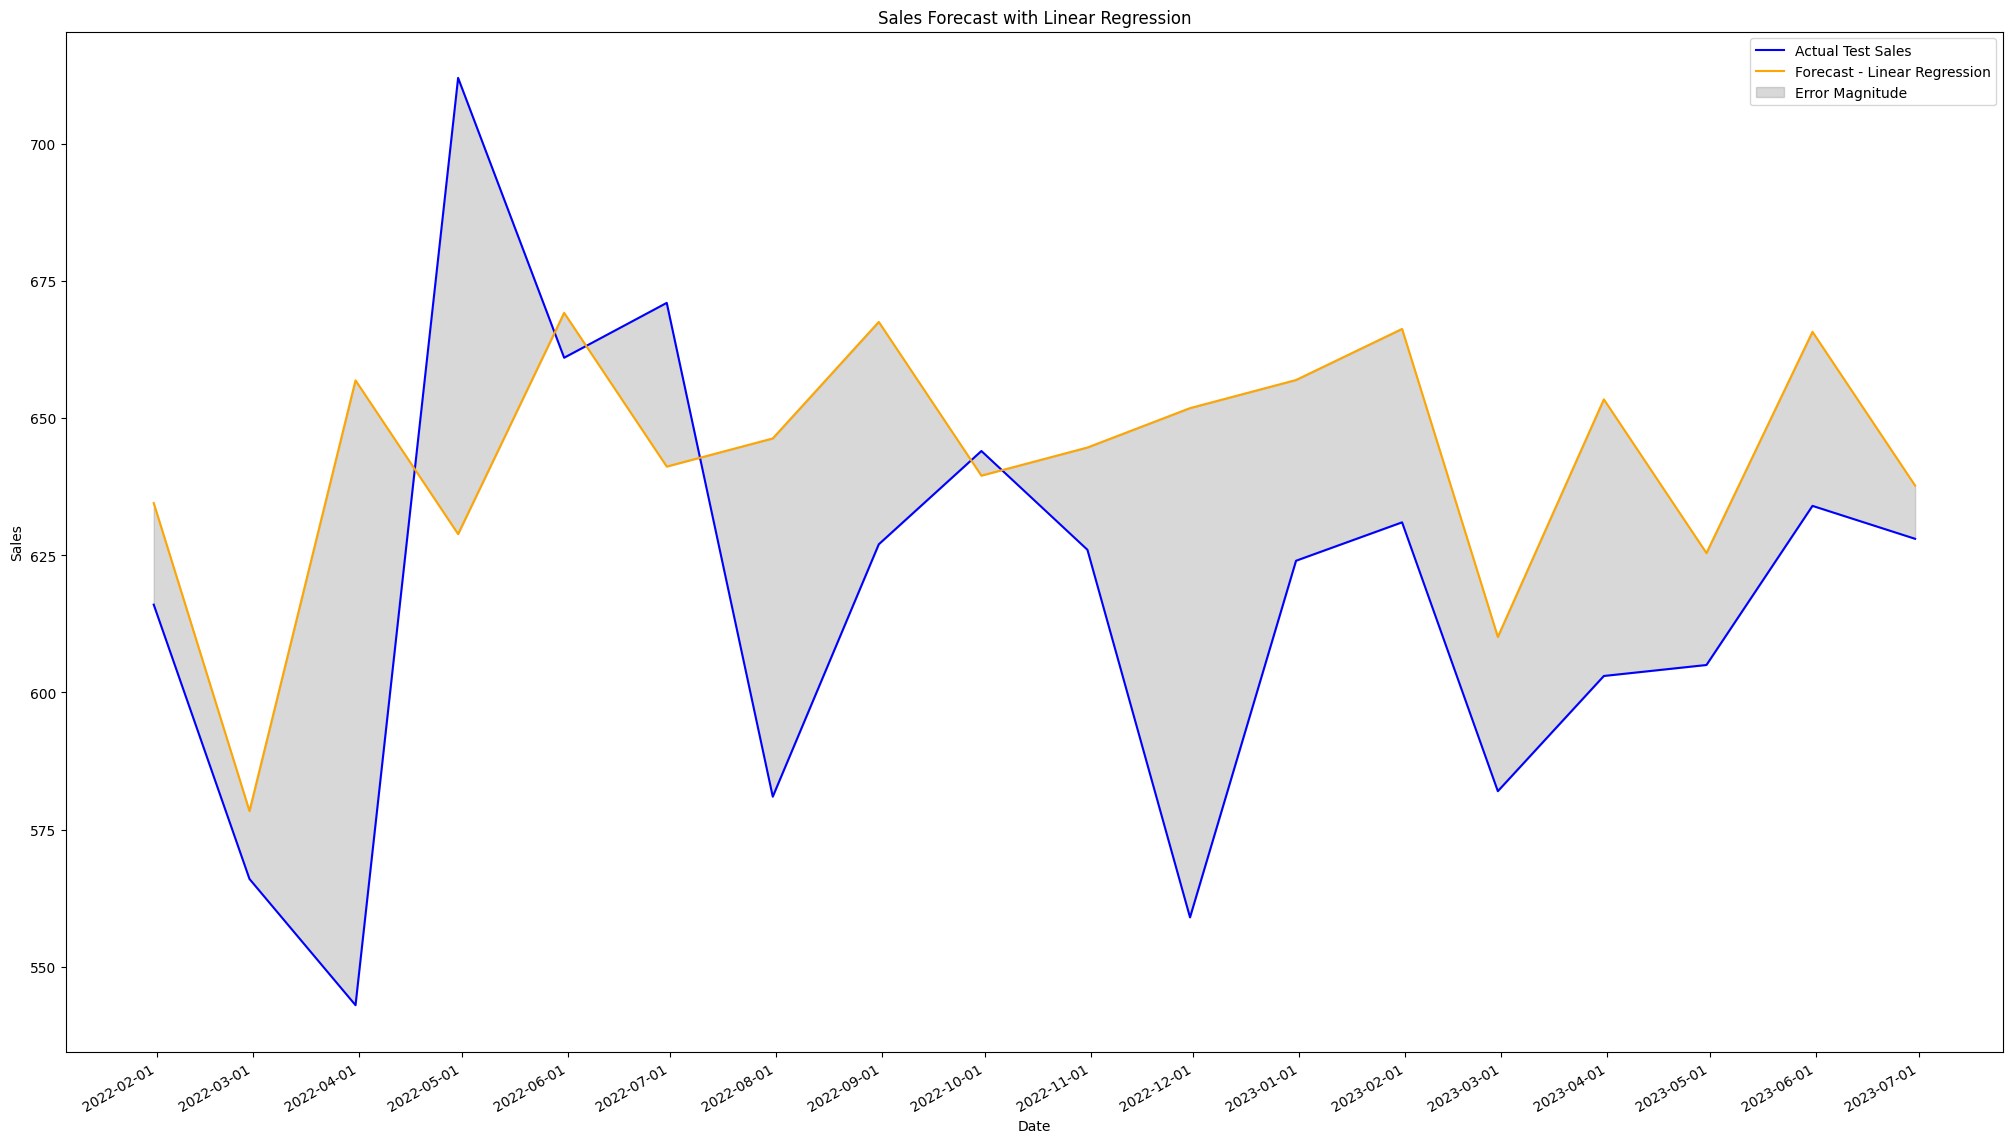


Individual Errors:


,sales,pred_sales,errors
date,,,
2022-01-31,616,634.512822,18.512822
2022-02-28,566,578.379014,12.379014
2022-03-31,543,656.872981,113.872981
2022-04-30,712,628.856256,-83.143744
2022-05-31,661,669.177835,8.177835
2022-06-30,671,641.161110,-29.838890
2022-07-31,581,646.289120,65.289120
2022-08-31,627,667.524505,40.524505
2022-09-30,644,639.507780,-4.492220



Total Actual Sales: 11113.00
Total Predicted Sales: 11574.26


In [10]:
df = pd.read_csv('C:/Users/moham/Desktop/itemThreeMS.csv')
df = df[df['store'] == 1]
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['weekday'] = np.where(df['weekday'] == 0, 7, df['weekday'])
for i in range(1, 8):
    lag_i = 'lag_' + str(i)
    df[lag_i] = df.sales.shift(i)
df['rolling_mean'] = df.sales.rolling(window=7).mean()
df['rolling_max'] = df.sales.rolling(window=7).max()
df['rolling_min'] = df.sales.rolling(window=7).min()
df = df.dropna(how='any', axis=1)
df = df.set_index('date')
train_df = df.loc[:'2021-12-31']
test_df = df.loc['2022-01-01':]
X_train = train_df.drop(['sales'], axis=1)
y_train = train_df['sales'].values
X_test = test_df.drop(['sales'], axis=1)
y_test = test_df['sales'].values
top_features = SelectKBest(score_func=f_regression, k=5)
fit = top_features.fit(X_train, y_train)
X_train = X_train[X_train.columns[top_features.get_support()]]
X_test = X_test[X_test.columns[top_features.get_support()]]
model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)
errors_df = test_df[['sales']].copy()
errors_df['pred_sales'] = preds
errors_df['errors'] = preds - y_test
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mae = mean_absolute_error(errors_df['sales'], errors_df['pred_sales'])
rmse = sqrt(mean_squared_error(errors_df['sales'], errors_df['pred_sales']))
mape_value = mape(errors_df['sales'], errors_df['pred_sales'])
r_squared = r2_score(errors_df['sales'], errors_df['pred_sales'])
accuracy = r_squared * 100 
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'MAPE', 'Accuracy'],
    'Value': [mae, rmse, mape_value, accuracy]
})
print("Evaluation Metrics:")
display(metrics_df)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.figure(figsize=(25, 15))
plt.plot(errors_df.index, errors_df['sales'], label='Actual Test Sales', color='blue')
plt.plot(errors_df.index, errors_df['pred_sales'], label='Forecast - Linear Regression', color='orange')
plt.fill_between(errors_df.index, errors_df['sales'], errors_df['pred_sales'], color='gray', alpha=0.3, label='Error Magnitude')
plt.title('Sales Forecast with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()
plt.show()
print("\nIndividual Errors:")
display(errors_df[['sales', 'pred_sales', 'errors']])
total_actual_sales = errors_df['sales'].sum()
total_predicted_sales = errors_df['pred_sales'].sum()
print("\nTotal Actual Sales: {:.2f}".format(total_actual_sales))
print("Total Predicted Sales: {:.2f}".format(total_predicted_sales))

________________________________________________________________________________________________________________________________
# Forecast For The Fourth Item:
- The same previous steps will be repated.

Evaluation Metrics:


,Metric,Value
0,MAE,65.336911
1,RMSE,72.814165
2,MAPE,9.500125
3,Accuracy,8.880370


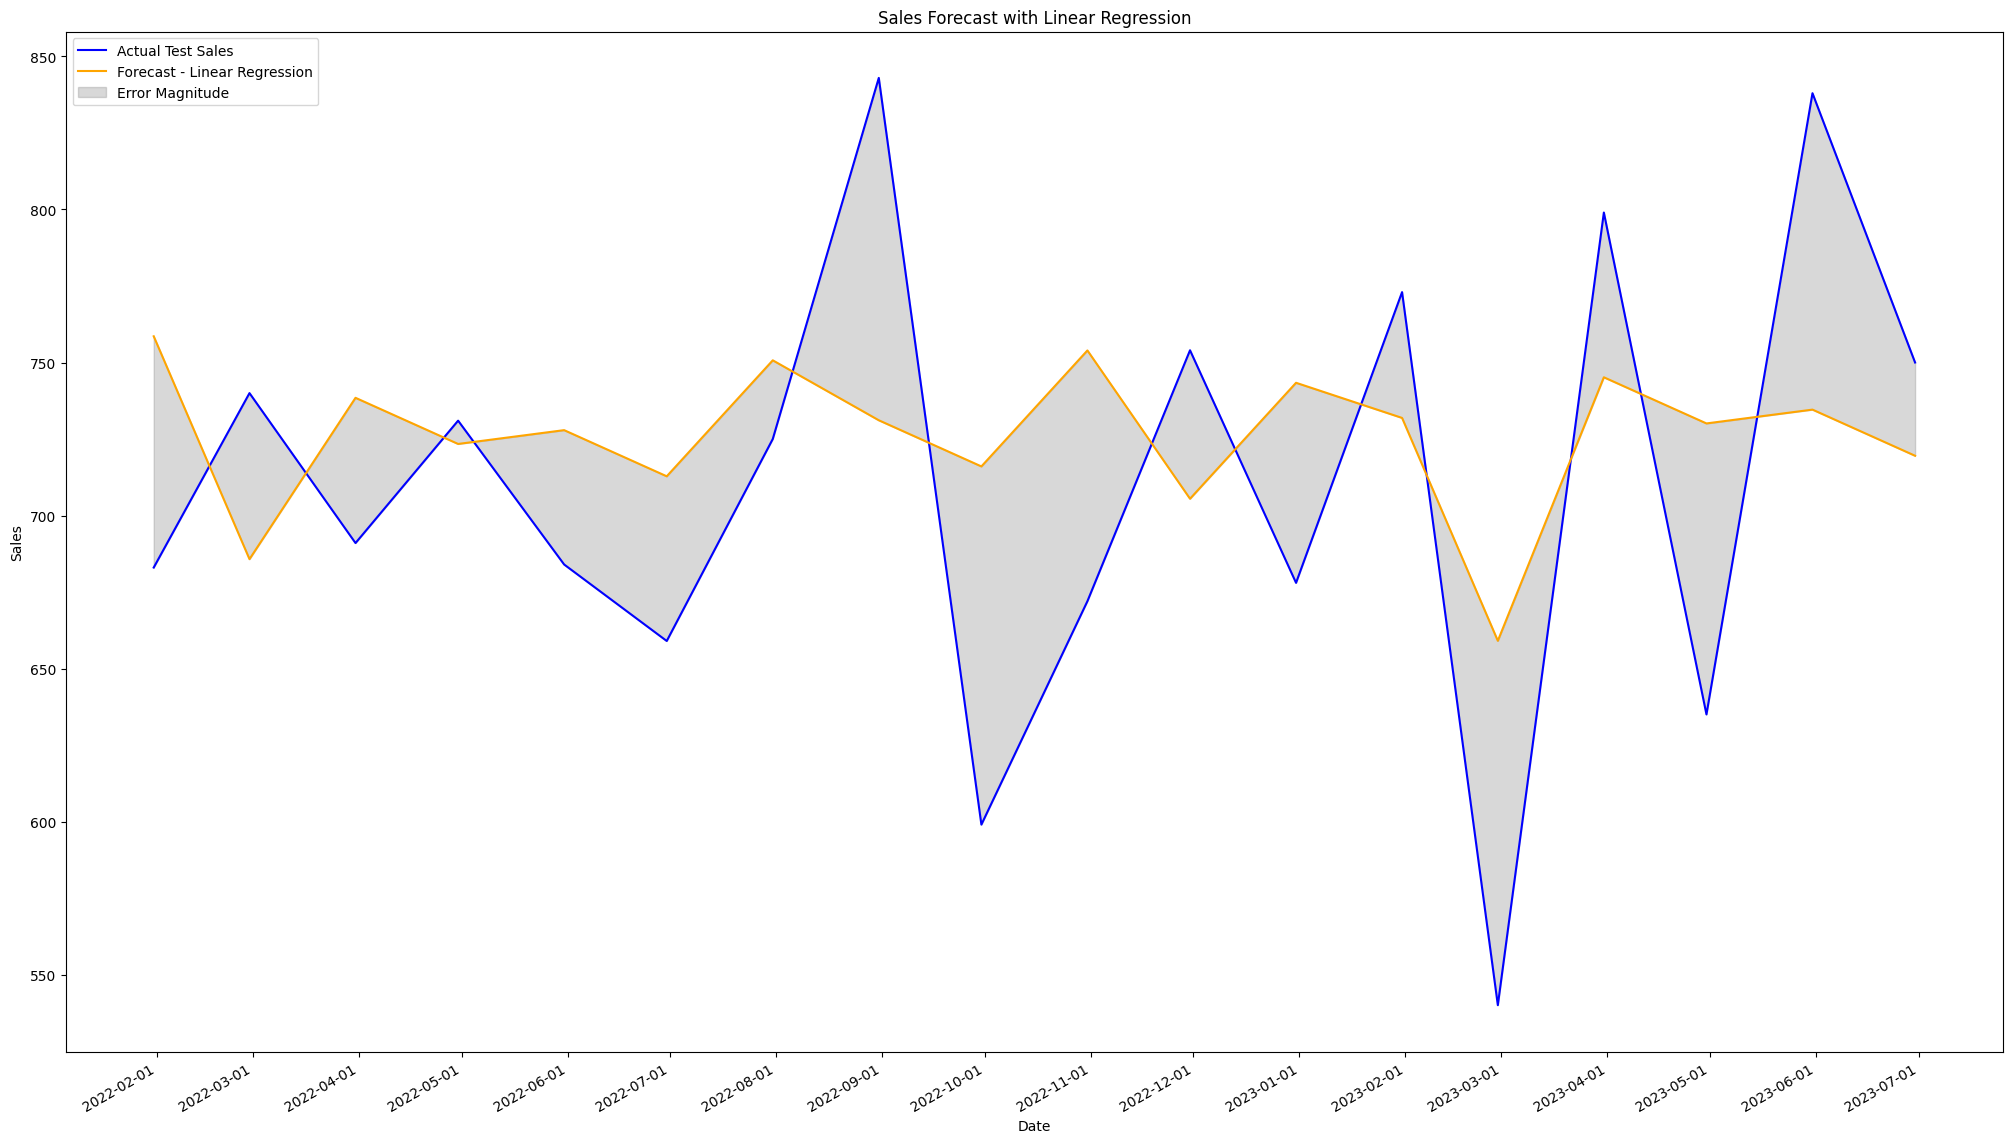


Individual Errors:


,sales,pred_sales,errors
date,,,
2022-01-31,683,758.569626,75.569626
2022-02-28,740,685.741362,-54.258638
2022-03-31,691,738.464096,47.464096
2022-04-30,731,723.384129,-7.615871
2022-05-31,684,727.897344,43.897344
2022-06-30,659,712.817377,53.817377
2022-07-31,725,750.716317,25.716317
2022-08-31,843,731.124774,-111.875226
2022-09-30,599,716.044806,117.044806



Total Actual Sales: 12794.00
Total Predicted Sales: 13067.91


In [11]:
df = pd.read_csv('C:/Users/moham/Desktop/itemFourMS.csv')
df = df[df['store'] == 1]
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['weekday'] = np.where(df['weekday'] == 0, 7, df['weekday'])
for i in range(1, 8):
    lag_i = 'lag_' + str(i)
    df[lag_i] = df.sales.shift(i)
df['rolling_mean'] = df.sales.rolling(window=7).mean()
df['rolling_max'] = df.sales.rolling(window=7).max()
df['rolling_min'] = df.sales.rolling(window=7).min()
df = df.dropna(how='any', axis=1)
df = df.set_index('date')
train_df = df.loc[:'2021-12-31']
test_df = df.loc['2022-01-01':]
X_train = train_df.drop(['sales'], axis=1)
y_train = train_df['sales'].values
X_test = test_df.drop(['sales'], axis=1)
y_test = test_df['sales'].values
top_features = SelectKBest(score_func=f_regression, k=5)
fit = top_features.fit(X_train, y_train)
X_train = X_train[X_train.columns[top_features.get_support()]]
X_test = X_test[X_test.columns[top_features.get_support()]]
model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)
errors_df = test_df[['sales']].copy()
errors_df['pred_sales'] = preds
errors_df['errors'] = preds - y_test
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mae = mean_absolute_error(errors_df['sales'], errors_df['pred_sales'])
rmse = sqrt(mean_squared_error(errors_df['sales'], errors_df['pred_sales']))
mape_value = mape(errors_df['sales'], errors_df['pred_sales'])
r_squared = r2_score(errors_df['sales'], errors_df['pred_sales'])
accuracy = r_squared * 100 
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'MAPE', 'Accuracy'],
    'Value': [mae, rmse, mape_value, accuracy]
})
print("Evaluation Metrics:")
display(metrics_df)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.figure(figsize=(25, 15))
plt.plot(errors_df.index, errors_df['sales'], label='Actual Test Sales', color='blue')
plt.plot(errors_df.index, errors_df['pred_sales'], label='Forecast - Linear Regression', color='orange')
plt.fill_between(errors_df.index, errors_df['sales'], errors_df['pred_sales'], color='gray', alpha=0.3, label='Error Magnitude')
plt.title('Sales Forecast with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()
plt.show()
print("\nIndividual Errors:")
display(errors_df[['sales', 'pred_sales', 'errors']])
total_actual_sales = errors_df['sales'].sum()
total_predicted_sales = errors_df['pred_sales'].sum()
print("\nTotal Actual Sales: {:.2f}".format(total_actual_sales))
print("Total Predicted Sales: {:.2f}".format(total_predicted_sales))

________________________________________________________________________________________________________________________________
# Forecast For The Fifth Item:
- The same previous steps will be repated.

Evaluation Metrics:


,Metric,Value
0,MAE,69.615618
1,RMSE,80.074302
2,MAPE,8.756294
3,Accuracy,2.315994


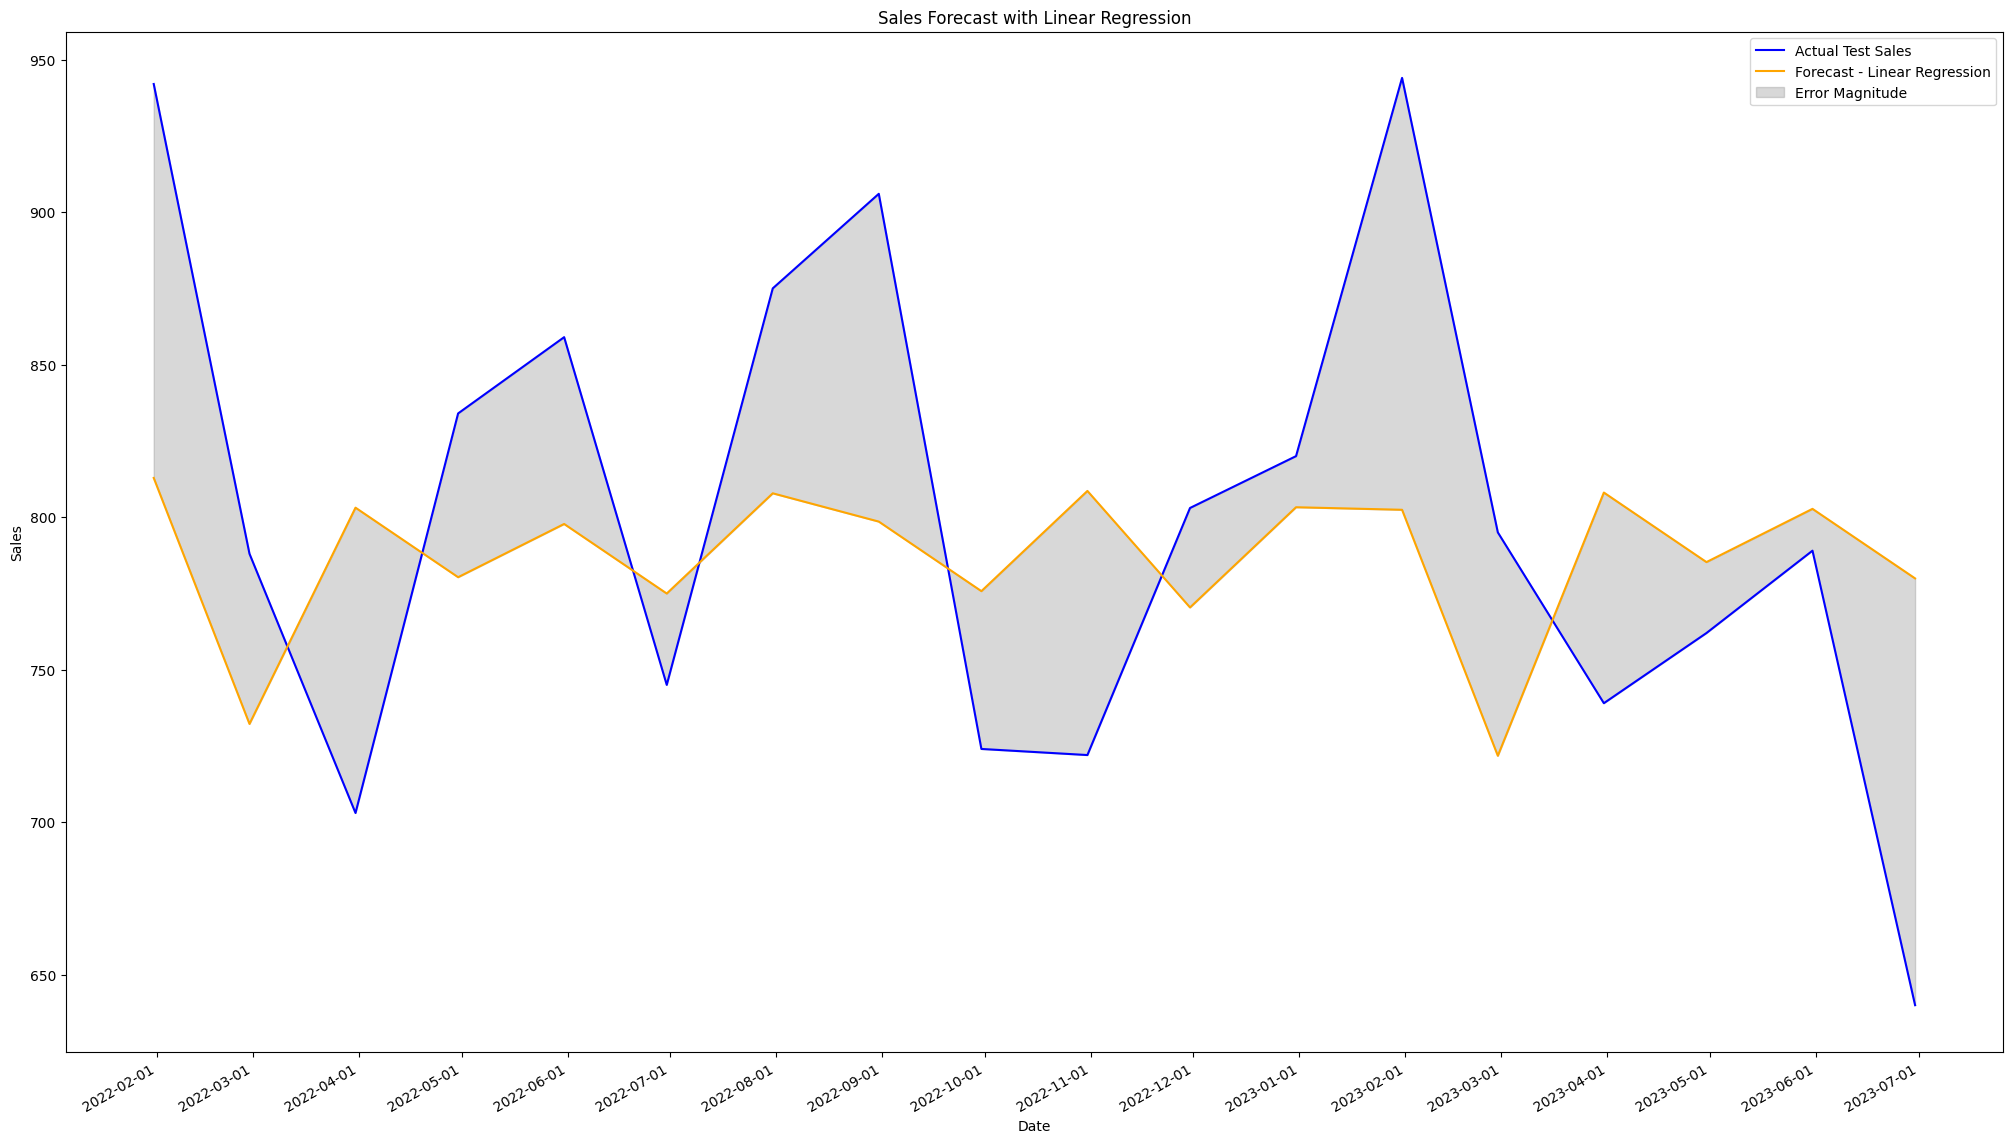


Individual Errors:


,sales,pred_sales,errors
date,,,
2022-01-31,942,812.852168,-129.147832
2022-02-28,788,732.199457,-55.800543
2022-03-31,703,803.104854,100.104854
2022-04-30,834,780.304963,-53.695037
2022-05-31,859,797.757610,-61.242390
2022-06-30,745,774.957719,29.957719
2022-07-31,875,807.810612,-67.189388
2022-08-31,906,798.536885,-107.463115
2022-09-30,724,775.736993,51.736993



Total Actual Sales: 14390.00
Total Predicted Sales: 14165.60


In [12]:
df = pd.read_csv('C:/Users/moham/Desktop/itemFiveMS.csv')
df = df[df['store'] == 1]
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['weekday'] = np.where(df['weekday'] == 0, 7, df['weekday'])
for i in range(1, 8):
    lag_i = 'lag_' + str(i)
    df[lag_i] = df.sales.shift(i)
df['rolling_mean'] = df.sales.rolling(window=7).mean()
df['rolling_max'] = df.sales.rolling(window=7).max()
df['rolling_min'] = df.sales.rolling(window=7).min()
df = df.dropna(how='any', axis=1)
df = df.set_index('date')
train_df = df.loc[:'2021-12-31']
test_df = df.loc['2022-01-01':]
X_train = train_df.drop(['sales'], axis=1)
y_train = train_df['sales'].values
X_test = test_df.drop(['sales'], axis=1)
y_test = test_df['sales'].values
top_features = SelectKBest(score_func=f_regression, k=5)
fit = top_features.fit(X_train, y_train)
X_train = X_train[X_train.columns[top_features.get_support()]]
X_test = X_test[X_test.columns[top_features.get_support()]]
model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)
errors_df = test_df[['sales']].copy()
errors_df['pred_sales'] = preds
errors_df['errors'] = preds - y_test
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mae = mean_absolute_error(errors_df['sales'], errors_df['pred_sales'])
rmse = sqrt(mean_squared_error(errors_df['sales'], errors_df['pred_sales']))
mape_value = mape(errors_df['sales'], errors_df['pred_sales'])
r_squared = r2_score(errors_df['sales'], errors_df['pred_sales'])
accuracy = r_squared * 100 
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'MAPE', 'Accuracy'],
    'Value': [mae, rmse, mape_value, accuracy]
})
print("Evaluation Metrics:")
display(metrics_df)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.figure(figsize=(25, 15))
plt.plot(errors_df.index, errors_df['sales'], label='Actual Test Sales', color='blue')
plt.plot(errors_df.index, errors_df['pred_sales'], label='Forecast - Linear Regression', color='orange')
plt.fill_between(errors_df.index, errors_df['sales'], errors_df['pred_sales'], color='gray', alpha=0.3, label='Error Magnitude')
plt.title('Sales Forecast with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()
plt.show()
print("\nIndividual Errors:")
display(errors_df[['sales', 'pred_sales', 'errors']])
total_actual_sales = errors_df['sales'].sum()
total_predicted_sales = errors_df['pred_sales'].sum()
print("\nTotal Actual Sales: {:.2f}".format(total_actual_sales))
print("Total Predicted Sales: {:.2f}".format(total_predicted_sales))

________________________________________________________________________________________________________________________________
# Forecast For The Sixth Item:
- The same previous steps will be repated.

Evaluation Metrics:


,Metric,Value
0,MAE,74.309535
1,RMSE,100.992613
2,MAPE,9.028653
3,Accuracy,3.959324


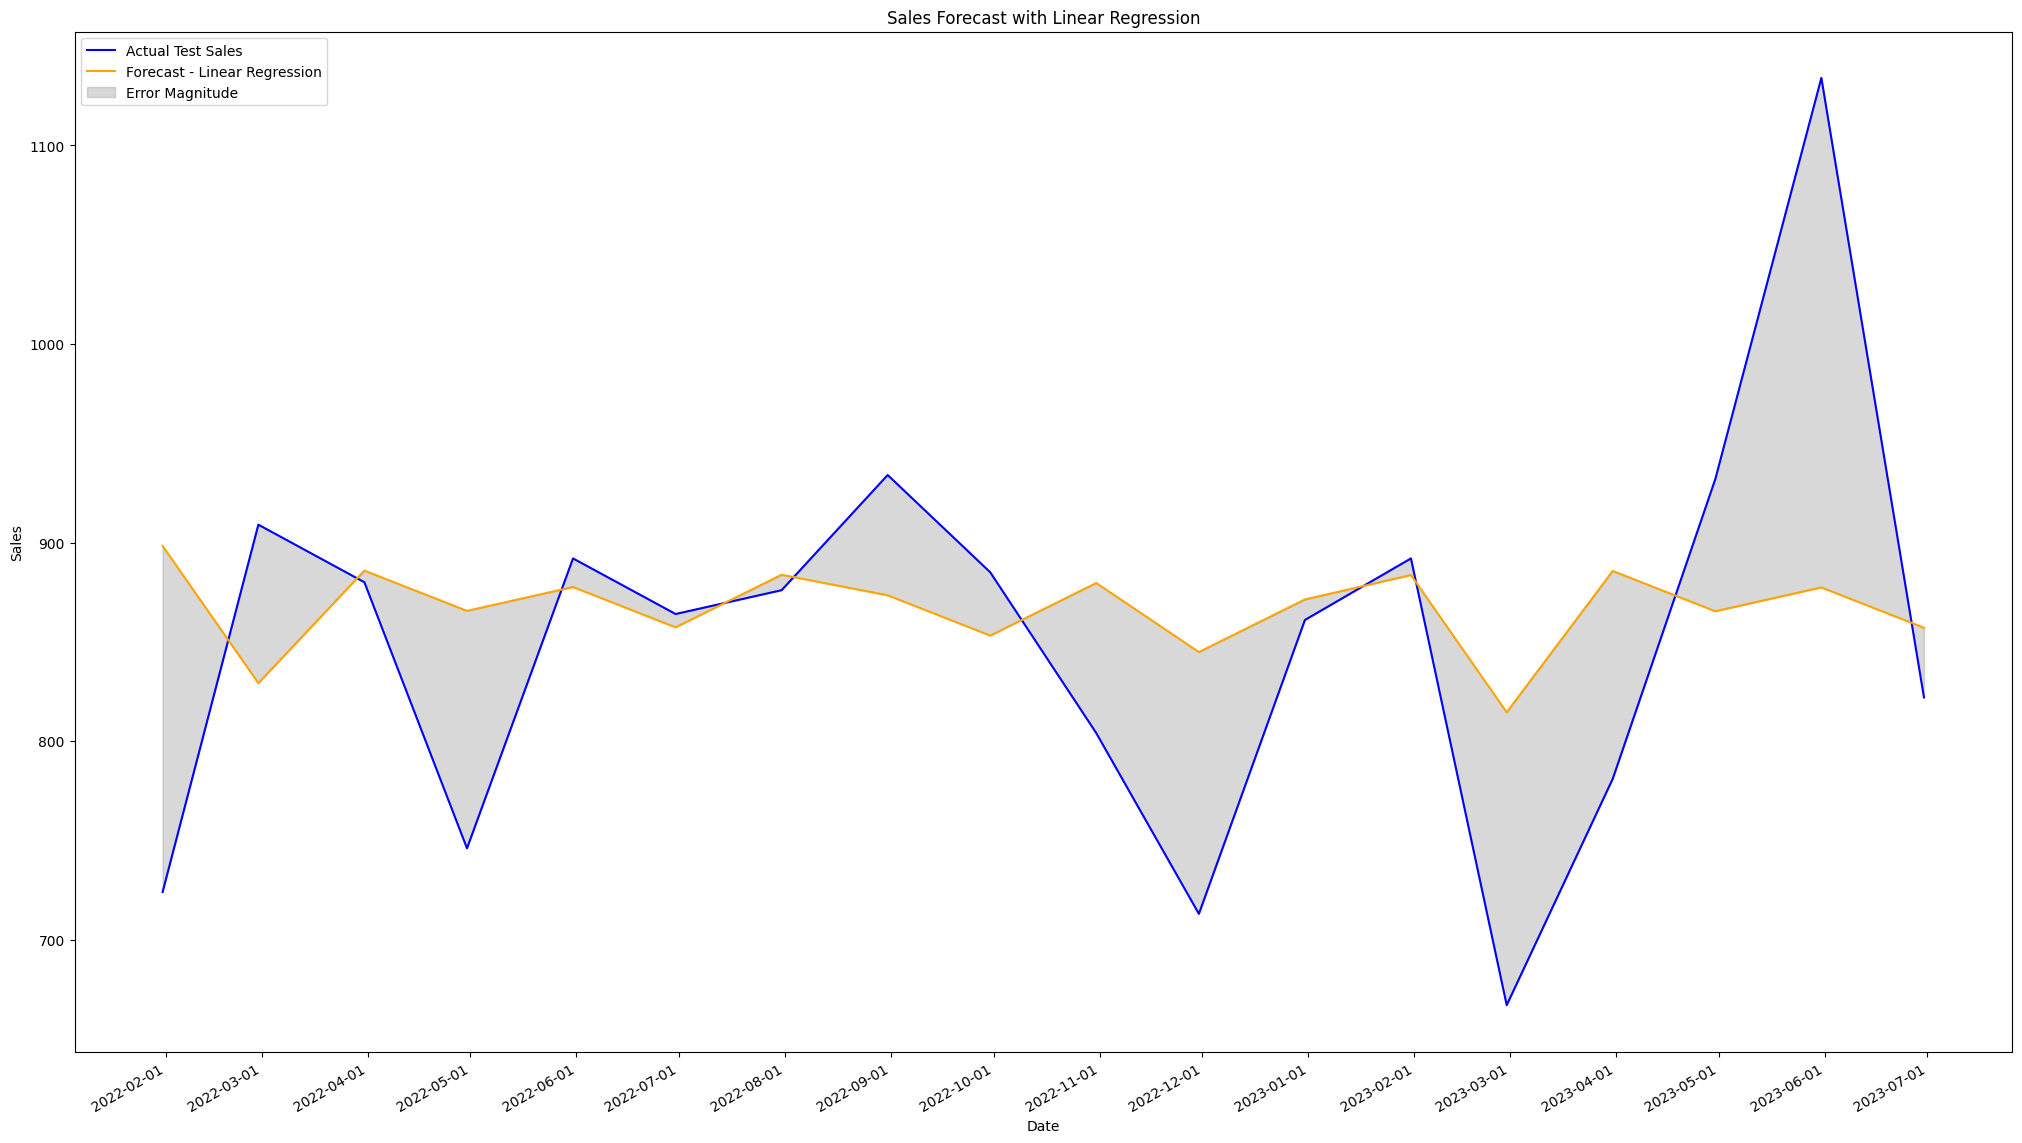


Individual Errors:


,sales,pred_sales,errors
date,,,
2022-01-31,724,898.294016,174.294016
2022-02-28,909,829.161654,-79.838346
2022-03-31,880,885.871760,5.871760
2022-04-30,746,865.579236,119.579236
2022-05-31,892,877.584914,-14.415086
2022-06-30,864,857.292390,-6.707610
2022-07-31,876,883.771998,7.771998
2022-08-31,934,873.425462,-60.574538
2022-09-30,885,853.132937,-31.867063



Total Actual Sales: 15316.00
Total Predicted Sales: 15603.57


In [13]:
df = pd.read_csv('C:/Users/moham/Desktop/itemSixMS.csv')
df = df[df['store'] == 1]
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['weekday'] = np.where(df['weekday'] == 0, 7, df['weekday'])
for i in range(1, 8):
    lag_i = 'lag_' + str(i)
    df[lag_i] = df.sales.shift(i)
df['rolling_mean'] = df.sales.rolling(window=7).mean()
df['rolling_max'] = df.sales.rolling(window=7).max()
df['rolling_min'] = df.sales.rolling(window=7).min()
df = df.dropna(how='any', axis=1)
df = df.set_index('date')
train_df = df.loc[:'2021-12-31']
test_df = df.loc['2022-01-01':]
X_train = train_df.drop(['sales'], axis=1)
y_train = train_df['sales'].values
X_test = test_df.drop(['sales'], axis=1)
y_test = test_df['sales'].values
top_features = SelectKBest(score_func=f_regression, k=5)
fit = top_features.fit(X_train, y_train)
X_train = X_train[X_train.columns[top_features.get_support()]]
X_test = X_test[X_test.columns[top_features.get_support()]]
model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)
errors_df = test_df[['sales']].copy()
errors_df['pred_sales'] = preds
errors_df['errors'] = preds - y_test
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mae = mean_absolute_error(errors_df['sales'], errors_df['pred_sales'])
rmse = sqrt(mean_squared_error(errors_df['sales'], errors_df['pred_sales']))
mape_value = mape(errors_df['sales'], errors_df['pred_sales'])
r_squared = r2_score(errors_df['sales'], errors_df['pred_sales'])
accuracy = r_squared * 100 
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'MAPE', 'Accuracy'],
    'Value': [mae, rmse, mape_value, accuracy]
})
print("Evaluation Metrics:")
display(metrics_df)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.figure(figsize=(25, 15))
plt.plot(errors_df.index, errors_df['sales'], label='Actual Test Sales', color='blue')
plt.plot(errors_df.index, errors_df['pred_sales'], label='Forecast - Linear Regression', color='orange')
plt.fill_between(errors_df.index, errors_df['sales'], errors_df['pred_sales'], color='gray', alpha=0.3, label='Error Magnitude')
plt.title('Sales Forecast with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()
plt.show()
print("\nIndividual Errors:")
display(errors_df[['sales', 'pred_sales', 'errors']])
total_actual_sales = errors_df['sales'].sum()
total_predicted_sales = errors_df['pred_sales'].sum()
print("\nTotal Actual Sales: {:.2f}".format(total_actual_sales))
print("Total Predicted Sales: {:.2f}".format(total_predicted_sales))

________________________________________________________________________________________________________________________________
# Forecast For All The  Store Items:
- The same previous steps will be repated.

Evaluation Metrics:


,Metric,Value
0,MAE,172.898211
1,RMSE,207.185579
2,MAPE,4.320232
3,Accuracy,23.705739


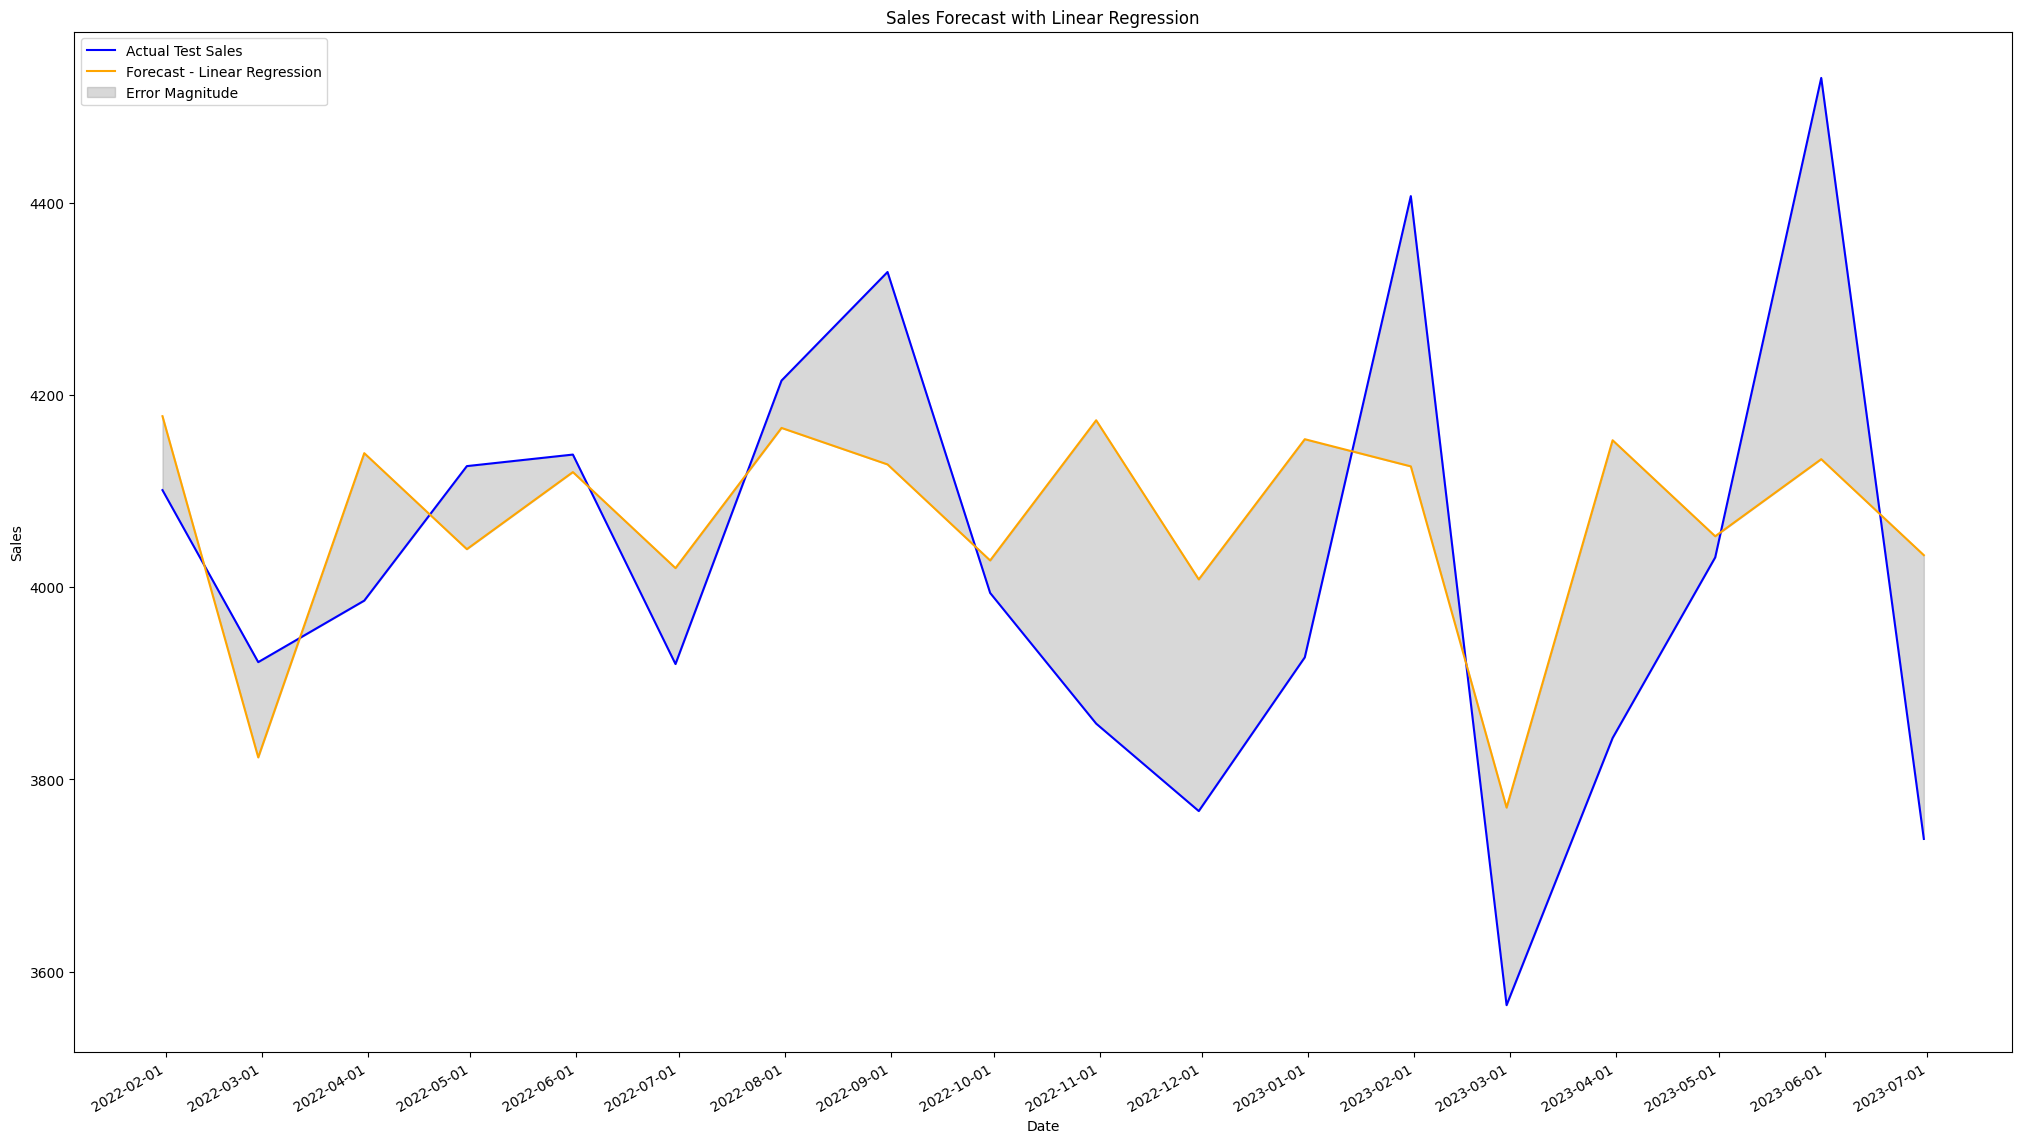


Individual Errors:


,sales,pred_sales,errors
date,,,
2022-01-31,4101,4177.930996,76.930996
2022-02-28,3922,3822.846002,-99.153998
2022-03-31,3986,4139.470450,153.470450
2022-04-30,4126,4039.555410,-86.444590
2022-05-31,4138,4119.769987,-18.230013
2022-06-30,3920,4019.854947,99.854947
2022-07-31,4215,4165.729820,-49.270180
2022-08-31,4328,4127.739462,-200.260538
2022-09-30,3994,4027.824422,33.824422



Total Actual Sales: 72396.00
Total Predicted Sales: 73245.29


In [14]:
df = pd.read_csv('C:/Users/moham/Desktop/storeItemsMS.csv')
df = df[df['store'] == 1]
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['weekday'] = np.where(df['weekday'] == 0, 7, df['weekday'])
for i in range(1, 8):
    lag_i = 'lag_' + str(i)
    df[lag_i] = df.sales.shift(i)
df['rolling_mean'] = df.sales.rolling(window=7).mean()
df['rolling_max'] = df.sales.rolling(window=7).max()
df['rolling_min'] = df.sales.rolling(window=7).min()
df = df.dropna(how='any', axis=1)
df = df.set_index('date')
train_df = df.loc[:'2021-12-31']
test_df = df.loc['2022-01-01':]
X_train = train_df.drop(['sales'], axis=1)
y_train = train_df['sales'].values
X_test = test_df.drop(['sales'], axis=1)
y_test = test_df['sales'].values
top_features = SelectKBest(score_func=f_regression, k=5)
fit = top_features.fit(X_train, y_train)
X_train = X_train[X_train.columns[top_features.get_support()]]
X_test = X_test[X_test.columns[top_features.get_support()]]
model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)
errors_df = test_df[['sales']].copy()
errors_df['pred_sales'] = preds
errors_df['errors'] = preds - y_test
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mae = mean_absolute_error(errors_df['sales'], errors_df['pred_sales'])
rmse = sqrt(mean_squared_error(errors_df['sales'], errors_df['pred_sales']))
mape_value = mape(errors_df['sales'], errors_df['pred_sales'])
r_squared = r2_score(errors_df['sales'], errors_df['pred_sales'])
accuracy = r_squared * 100 
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'MAPE', 'Accuracy'],
    'Value': [mae, rmse, mape_value, accuracy]
})
print("Evaluation Metrics:")
display(metrics_df)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.figure(figsize=(25, 15))
plt.plot(errors_df.index, errors_df['sales'], label='Actual Test Sales', color='blue')
plt.plot(errors_df.index, errors_df['pred_sales'], label='Forecast - Linear Regression', color='orange')
plt.fill_between(errors_df.index, errors_df['sales'], errors_df['pred_sales'], color='gray', alpha=0.3, label='Error Magnitude')
plt.title('Sales Forecast with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()
plt.show()
print("\nIndividual Errors:")
display(errors_df[['sales', 'pred_sales', 'errors']])
total_actual_sales = errors_df['sales'].sum()
total_predicted_sales = errors_df['pred_sales'].sum()
print("\nTotal Actual Sales: {:.2f}".format(total_actual_sales))
print("Total Predicted Sales: {:.2f}".format(total_predicted_sales))